importing Jupyter notebook from tumor_identifier.ipynb
608 1176


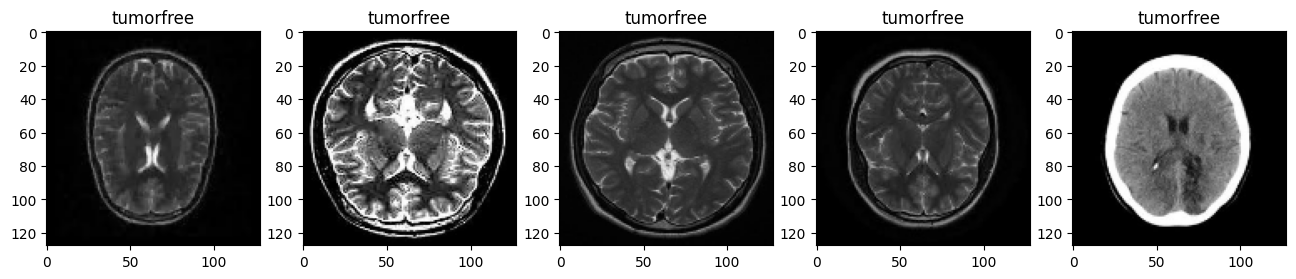

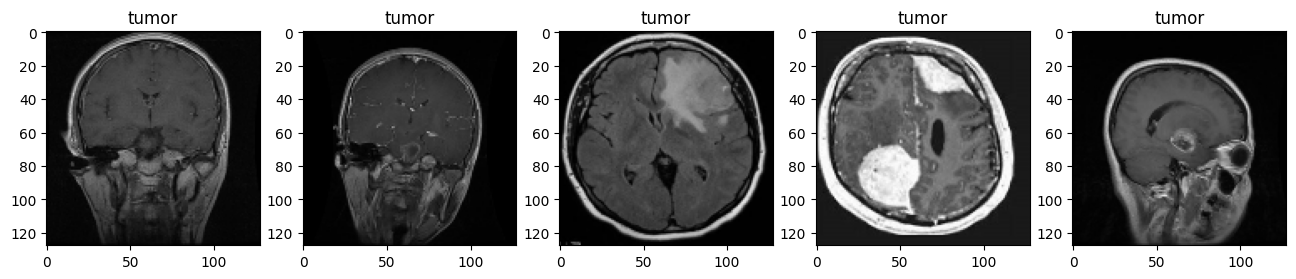

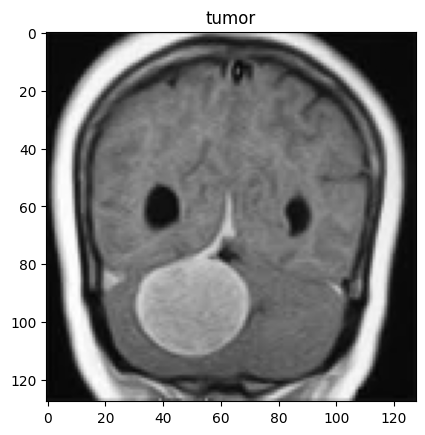

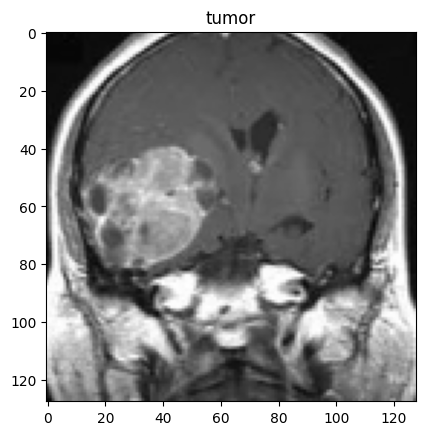

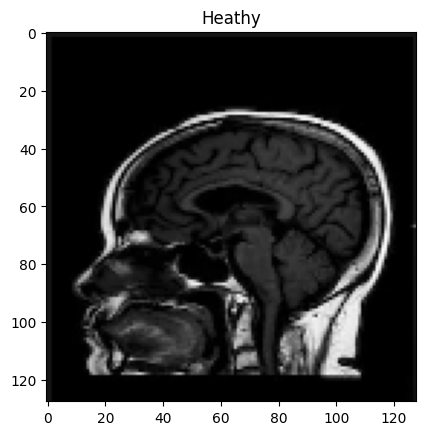

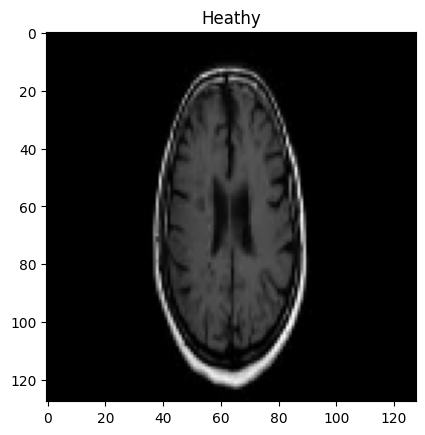

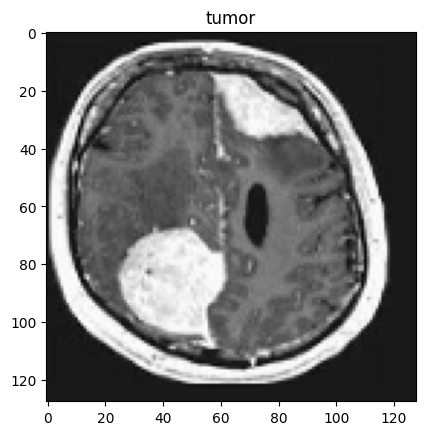

CNN(
  (cnn_model): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=2, stride=5, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): AvgPool2d(kernel_size=2, stride=5, padding=0)
  )
  (fc_model): Sequential(
    (0): Linear(in_features=256, out_features=120, bias=True)
    (1): Tanh()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): Tanh()
    (4): Linear(in_features=84, out_features=1, bias=True)
  )
)
importing Jupyter notebook from model1.ipynb
True
Accuracy-> 0.6591928251121076
Precission-> 0.6591928251121076
Recall-> 1.0
F1 Score-> <function f1_score at 0x00000213997C87C0>


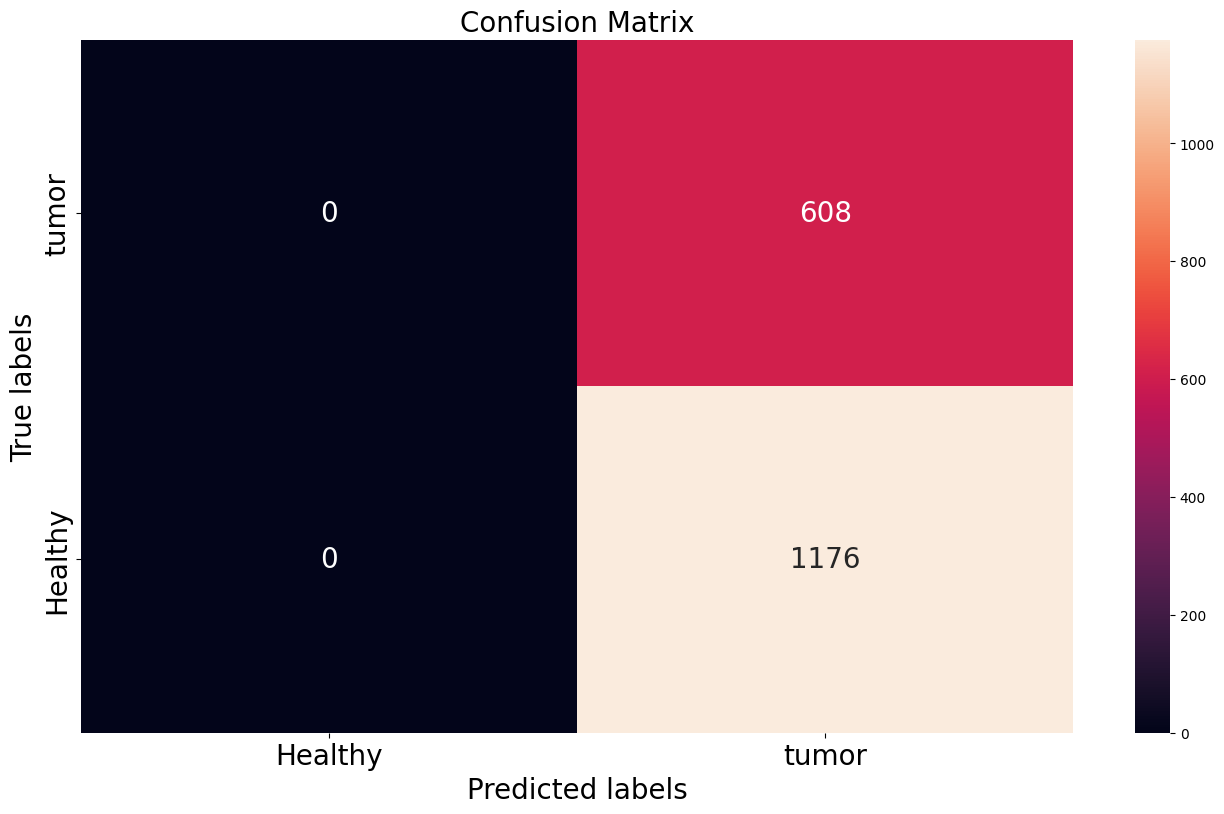

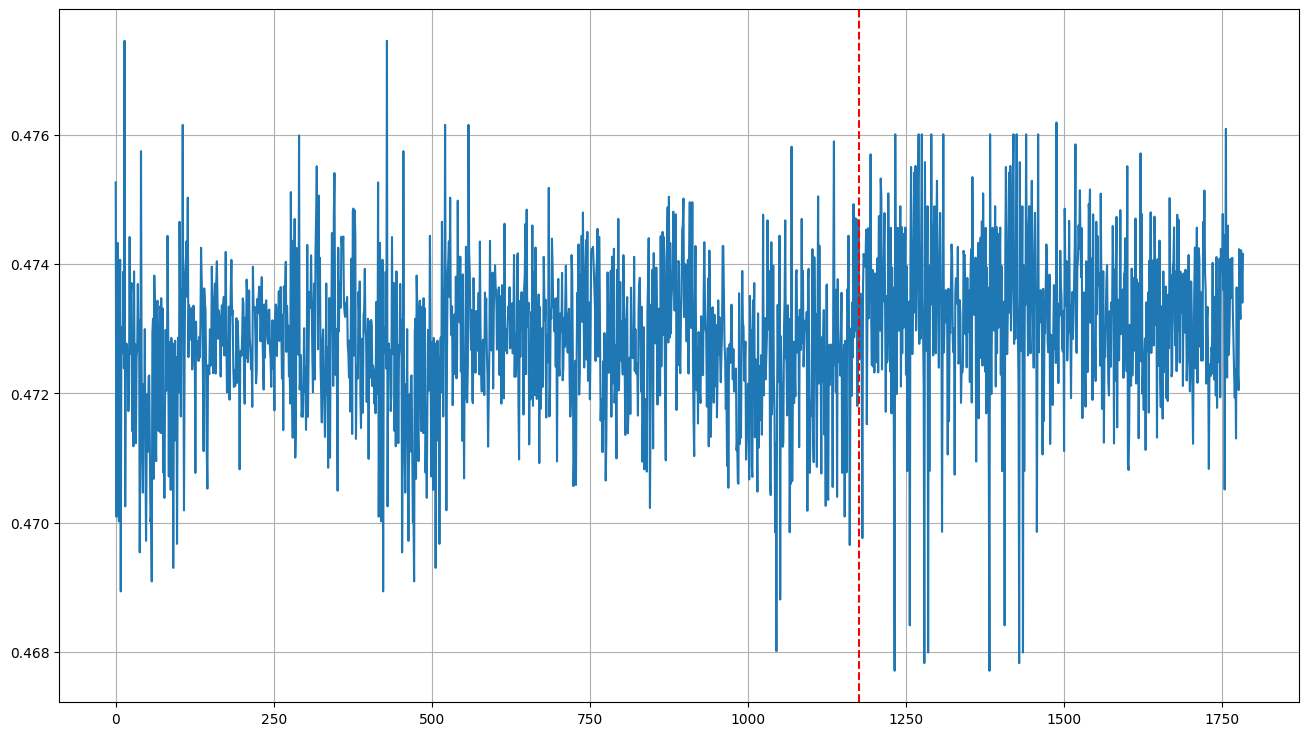

In [1]:
import import_ipynb
import tumor_identifier as ti
import model1 as m1

## Traing the Dumb Model

In [2]:
mri_dataset =ti.MRI()
mri_dataset.normalize()
device = ti.torch.device('cuda:0')
model = ti.CNN().to(device)

In [3]:
eta = 0.0001
EPOCH =400 
optimizer = ti.torch.optim.Adam(model.parameters(), lr=eta)
dataloader =ti.DataLoader(mri_dataset, batch_size=32, shuffle=True)
model.train()

CNN(
  (cnn_model): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): Tanh()
    (2): AvgPool2d(kernel_size=2, stride=5, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Tanh()
    (5): AvgPool2d(kernel_size=2, stride=5, padding=0)
  )
  (fc_model): Sequential(
    (0): Linear(in_features=256, out_features=120, bias=True)
    (1): Tanh()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): Tanh()
    (4): Linear(in_features=84, out_features=1, bias=True)
  )
)

In [4]:
for epoch in range(1, EPOCH):
    losses = []
    for D in dataloader:
        optimizer.zero_grad()
        data = D['image'].to(device)
        label = D['label'].to(device)
        y_hat = model(data)
        # define loss function
        error = ti.nn.BCELoss() 
        loss = ti.torch.sum(error(y_hat.squeeze(), label))
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    if (epoch+1) % 10 == 0:
        print('Train Epoch: {}\tLoss: {:.6f}'.format(epoch+1, ti.np.mean(losses)))

Train Epoch: 10	Loss: 0.559523
Train Epoch: 20	Loss: 0.482309
Train Epoch: 30	Loss: 0.435459
Train Epoch: 40	Loss: 0.402451
Train Epoch: 50	Loss: 0.380131
Train Epoch: 60	Loss: 0.341196
Train Epoch: 70	Loss: 0.319582
Train Epoch: 80	Loss: 0.295941
Train Epoch: 90	Loss: 0.270387
Train Epoch: 100	Loss: 0.253340
Train Epoch: 110	Loss: 0.216058
Train Epoch: 120	Loss: 0.196105
Train Epoch: 130	Loss: 0.167471
Train Epoch: 140	Loss: 0.143956
Train Epoch: 150	Loss: 0.122566
Train Epoch: 160	Loss: 0.104476
Train Epoch: 170	Loss: 0.086772
Train Epoch: 180	Loss: 0.069169
Train Epoch: 190	Loss: 0.056672
Train Epoch: 200	Loss: 0.057486
Train Epoch: 210	Loss: 0.033787
Train Epoch: 220	Loss: 0.028958
Train Epoch: 230	Loss: 0.018761
Train Epoch: 240	Loss: 0.011123
Train Epoch: 250	Loss: 0.006904
Train Epoch: 260	Loss: 0.006498
Train Epoch: 270	Loss: 0.002529
Train Epoch: 280	Loss: 0.001678
Train Epoch: 290	Loss: 0.001205
Train Epoch: 300	Loss: 0.001090
Train Epoch: 310	Loss: 0.000563
Train Epoch: 320	

In [5]:
model.eval()
dataloader = ti.DataLoader(mri_dataset, batch_size=32, shuffle=False)
outputs=[]
y_true = []
with ti.torch.no_grad():
    for D in dataloader:
        image =  D['image'].to(device)
        label = D['label'].to(device)
        
        y_hat = model(image)
        
        outputs.append(y_hat.cpu().detach().numpy())
        y_true.append(label.cpu().detach().numpy())
        
outputs = ti.np.concatenate( outputs, axis=0 )
y_true = ti.np.concatenate( y_true, axis=0 )

In [6]:
m1.accuracy_score(y_true, m1.threshold(outputs))

1.0

[Text(0, 0.5, 'tumor'), Text(0, 1.5, 'Healthy')]

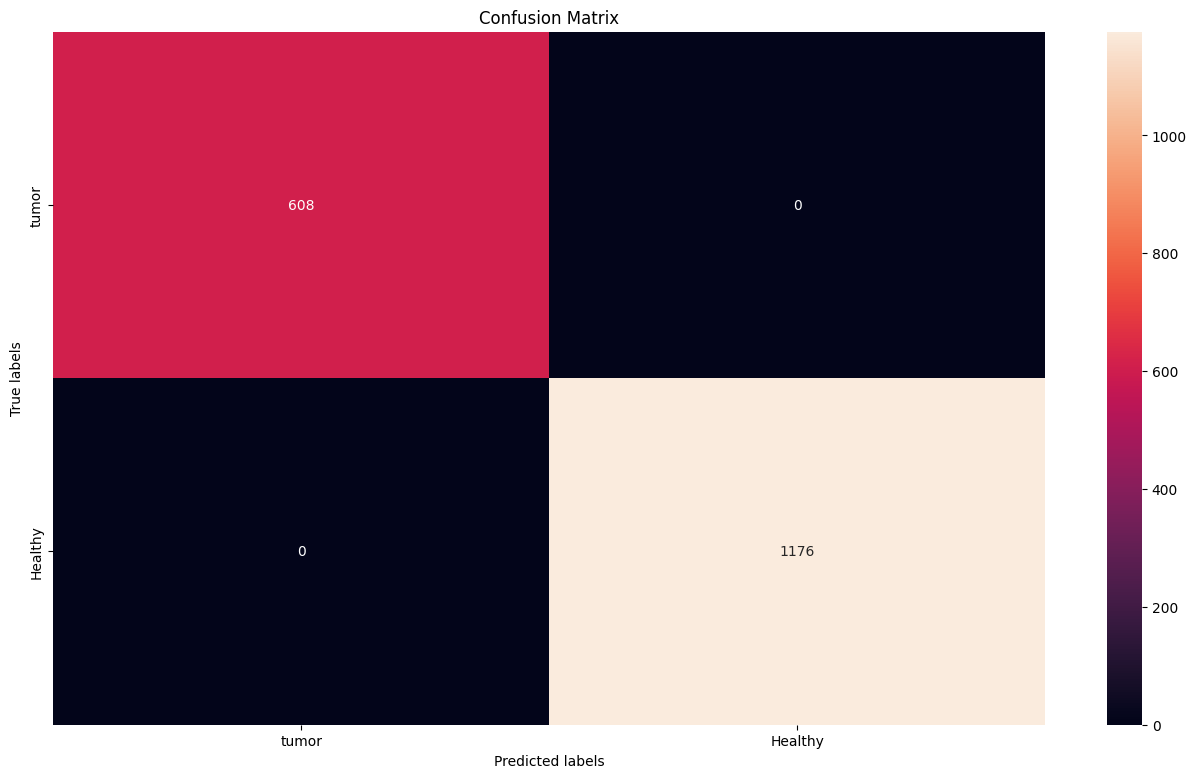

In [7]:
# Generate a confusion matrix using seaborn to visualize model performance
# cm: confusion matrix values
# annot=True: show values in each cell 
# fmt='g': format values in matrix without scientific notation
# ax: matplotlib subplot to draw heatmap on
# Labels, title, ticks: customize axis labels, plot title, tick labels
import seaborn as sns
cm = m1.confusion_matrix(y_true, m1.threshold(outputs))
ti.plt.figure(figsize=(16,9))

ax= ti.plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['tumor','Healthy'])
ax.yaxis.set_ticklabels(['tumor','Healthy'])

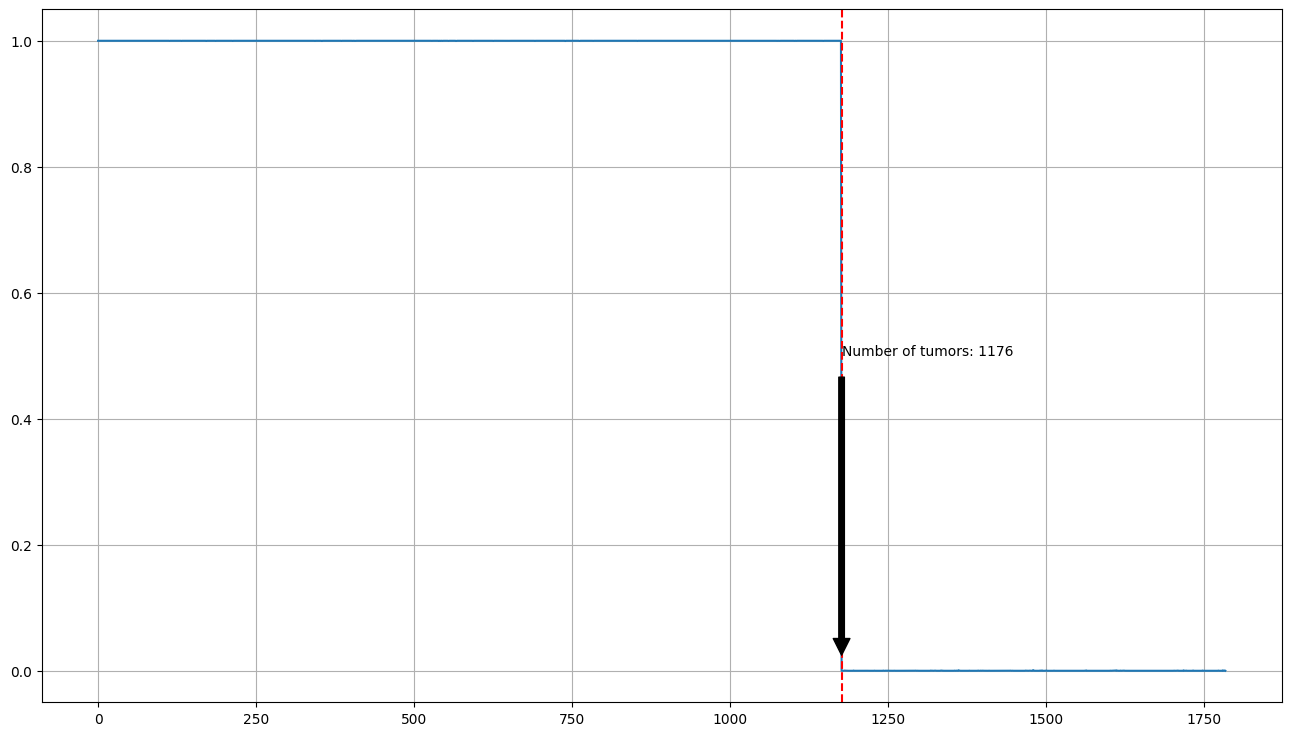

In [8]:
ti.plt.figure(figsize=(16,9))
ti.plt.plot(outputs)
ti.plt.axvline(x=len(ti.tumor), color='r', linestyle='--')

ti.plt.annotate('Number of tumors: {}'.format(len(ti.tumor)), 
             xy=(len(ti.tumor), 0), 
             xytext=(len(ti.tumor), 0.5),  # This specifies the location of the text
             arrowprops=dict(facecolor='black', shrink=0.05))
ti.plt.grid()